# Soccer Through the Ages

This dataset contains information on international soccer games throughout the years. It includes results of soccer games and information about the players who scored the goals. The dataset contains data from 1872 up to 2023.

The task is originally from DataCamp, I use it for training purposes. The source of data is [GitHub](https://github.com/martj42/international_results/tree/baf917b948eec00f659d2f187c33c13547f7adc4)

### 💾 The data

- `data/results.csv` - CSV with results of soccer games between 1872 and 2023
  - `home_score` - The score of the home team, excluding penalty shootouts
  - `away_score` - The score of the away team, excluding penalty shootouts
  - `tournament` - The name of the tournament
  - `city` - The name of the city where the game was played
  - `country` - The name of the country where the game was played
  - `neutral` - Whether the game was played at a neutral venue or not
- `data/shootouts.csv` - CSV with results of penalty shootouts in the soccer games
  - `winner` - The team that won the penalty shootout 
- `data/goalscorers.csv` - CSV with information on goal scorers of some of the soccer games in the results CSV
  - `team` - The team that scored the goal
  - `scorer` - The player who scored the goal
  - `minute` - The minute in the game when the goal was scored
  - `own_goal` - Whether it was an own goal or not
  - `penalty` - Whether the goal was scored as a penalty or not

The following columns can be found in all datasets:

- `date` - The date of the soccer game
- `home_team` - The team that played at home
- `away_team` - The team that played away

These shared columns fully identify the game that was played and can be used to join data between the different CSV files.

Firstly I am going to answer the questions given on DataCamp - then maybe explore the data more, although I do not find soccer as an attractive topic.

**0. Import and get the data to answer given questions.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv("data/results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
shootouts = pd.read_csv("data/shootouts.csv")
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [4]:
goalscorers = pd.read_csv("data/goalscorers.csv")
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


Prepare a table with winners of all games.

In [5]:
all_results = results.merge(shootouts, how='left', on=('date', 'home_team', 'away_team'))
all_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN


In [6]:
all_results.loc[all_results['home_score'] > all_results['away_score'], 'winner'] = all_results.loc[all_results['home_score'] > all_results['away_score'], 'home_team']
all_results.loc[all_results['away_score'] > all_results['home_score'], 'winner'] = all_results.loc[all_results['away_score'] > all_results['home_score'], 'away_team']
all_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [7]:
all_results['is_home_winner'] = all_results['home_team'] == all_results['winner']
all_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,True
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,True
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,True


In [8]:
all_results['is_a_tie'] = all_results['winner'].isna()
all_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,True,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,True,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,True,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,False,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland,False,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,True,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,True,False


In [9]:
null_winner = all_results[all_results['winner'].isna()]
null_winner.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,False,True
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,False,True
28,1883-03-17,Northern Ireland,Wales,1,1,Friendly,Belfast,Ireland,False,NaN,False,True
36,1885-03-14,England,Wales,1,1,British Home Championship,Blackburn,England,False,NaN,False,True
38,1885-03-21,England,Scotland,1,1,British Home Championship,London,England,False,NaN,False,True


**1. Which are the 15 countries that have won the most games since 1960? Show them in a horizontal bar plot.**

In [10]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44934 entries, 0 to 44933
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            44934 non-null  object
 1   home_team       44934 non-null  object
 2   away_team       44934 non-null  object
 3   home_score      44934 non-null  int64 
 4   away_score      44934 non-null  int64 
 5   tournament      44934 non-null  object
 6   city            44934 non-null  object
 7   country         44934 non-null  object
 8   neutral         44934 non-null  bool  
 9   winner          35118 non-null  object
 10  is_home_winner  44934 non-null  bool  
 11  is_a_tie        44934 non-null  bool  
dtypes: bool(3), int64(2), object(7)
memory usage: 3.6+ MB


In [11]:
countries_that_won_most = all_results[(all_results['date'] >= '1960-01-01') & (np.logical_not(all_results['is_a_tie']))]
countries_that_won_most.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,is_home_winner,is_a_tie
4653,1960-01-01,Morocco,Yugoslavia,0,5,Friendly,Casablanca,Morocco,False,Yugoslavia,False,False
4654,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,False,Yugoslavia,False,False
4655,1960-01-06,Italy,Switzerland,3,0,Central European International Cup,Naples,Italy,False,Italy,True,False
4656,1960-01-08,Egypt,Yugoslavia,0,1,Friendly,Cairo,United Arab Republic,True,Yugoslavia,False,False
4657,1960-01-27,Guinea-Bissau,Gambia,3,2,Friendly,Bissau,Guinea-Bissau,False,Guinea-Bissau,True,False


In [12]:
top_countries = countries_that_won_most['winner'].value_counts(sort=True, ascending=False).iloc[:15]
top_countries

Brazil         553
South Korea    473
Mexico         461
Germany        451
England        402
Argentina      393
Spain          378
France         359
Italy          353
Zambia         351
Sweden         346
Russia         342
Egypt          340
Netherlands    333
Poland         328
Name: winner, dtype: int64

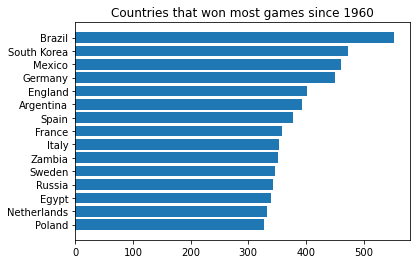

In [13]:
plt.barh(top_countries.iloc[::-1].index, top_countries.iloc[::-1])
plt.title('Countries that won most games since 1960')
plt.show()

**2. How many goals are scored in total in each minute of the game? Show this in a bar plot, with the minutes on the x-axis. If you're up for the challenge, you could even create an animated Plotly plot that shows how the distribution has changed over the years.**

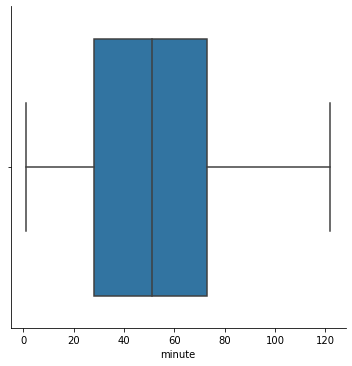

In [39]:
sns.catplot(x='minute', data=goalscorers, kind='box')
plt.show()

Add column with only year to the goalscorers table.

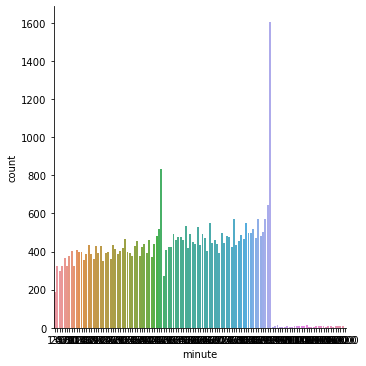

In [40]:
sns.catplot(x='minute', data=goalscorers, kind='count')
plt.show()

In [15]:
goalscorers['year'] = pd.to_datetime(goalscorers['date']).dt.year
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916


Add column with appriopriate decade to goalscorers table.

In [16]:
year_ranges = list(range(1910, 2040, 10))
year_ranges

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

In [24]:
goalscorers['decade'] = 0
for year_1, year_2 in zip(year_ranges[:-1], year_ranges[1:]):
    goalscorers.loc[(year_1 <= goalscorers['year']) & (goalscorers['year'] < year_2), 'decade'] = year_1
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,decade
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916,1910
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916,1910
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916,1910
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916,1910
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916,1910


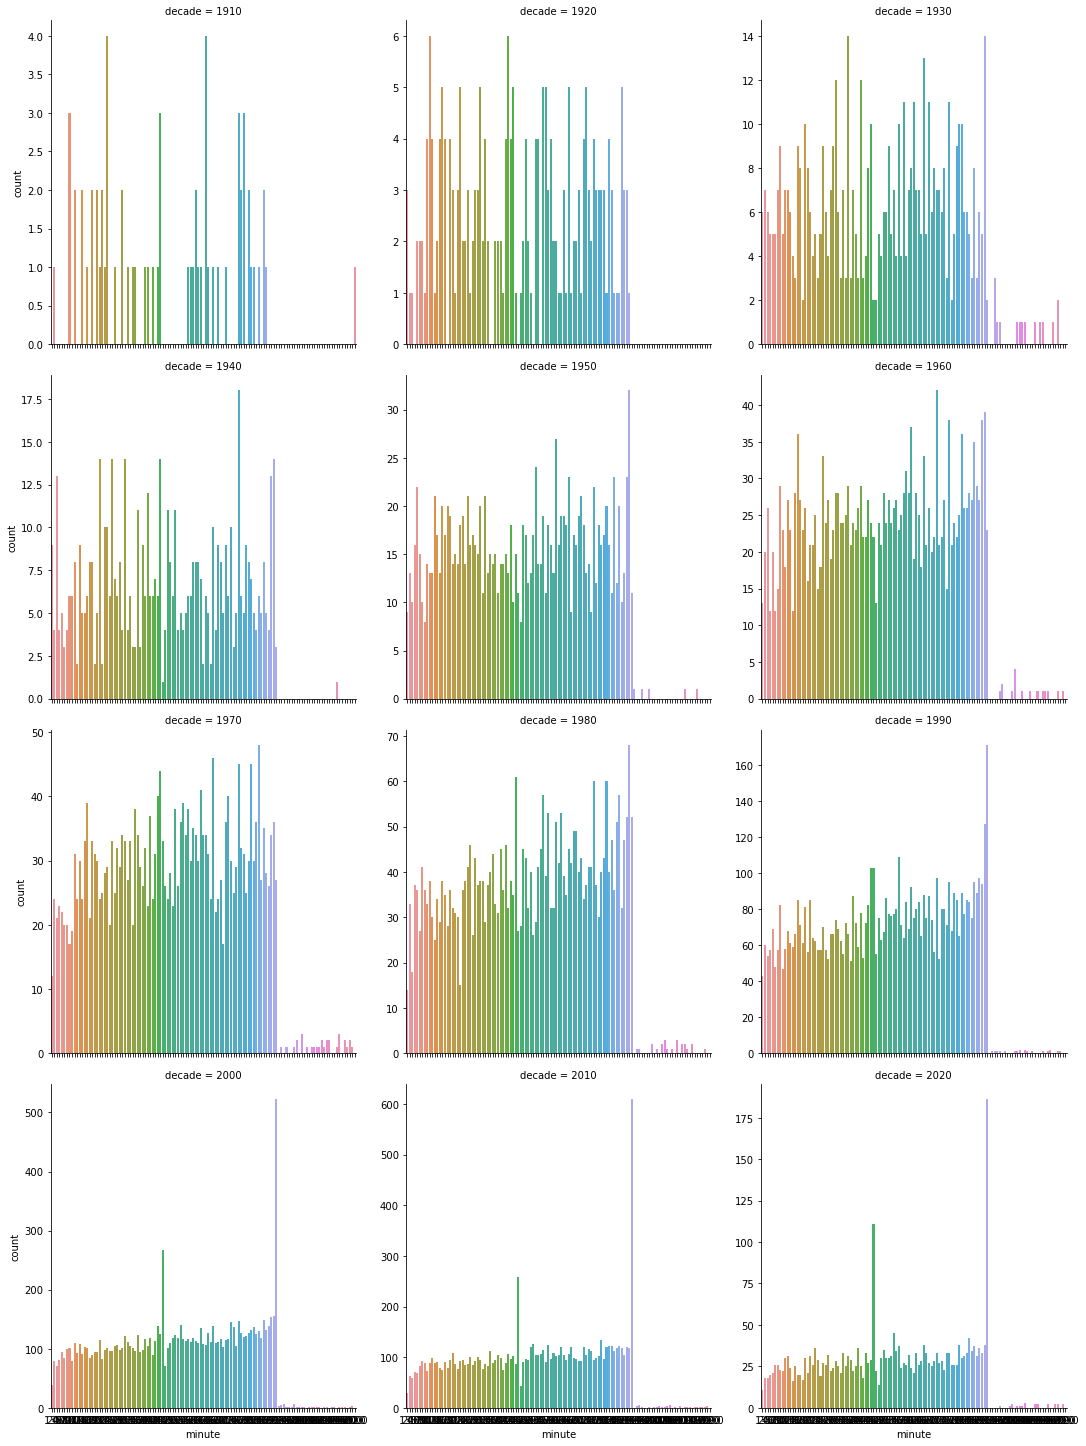

In [36]:
sns.catplot(x='minute', data=goalscorers, kind='count', col='decade', col_wrap=3, sharey=False)
plt.show()

In [37]:
max(goalscorers['minute'])

122.0

In [38]:
min(goalscorers['minute'])

1.0

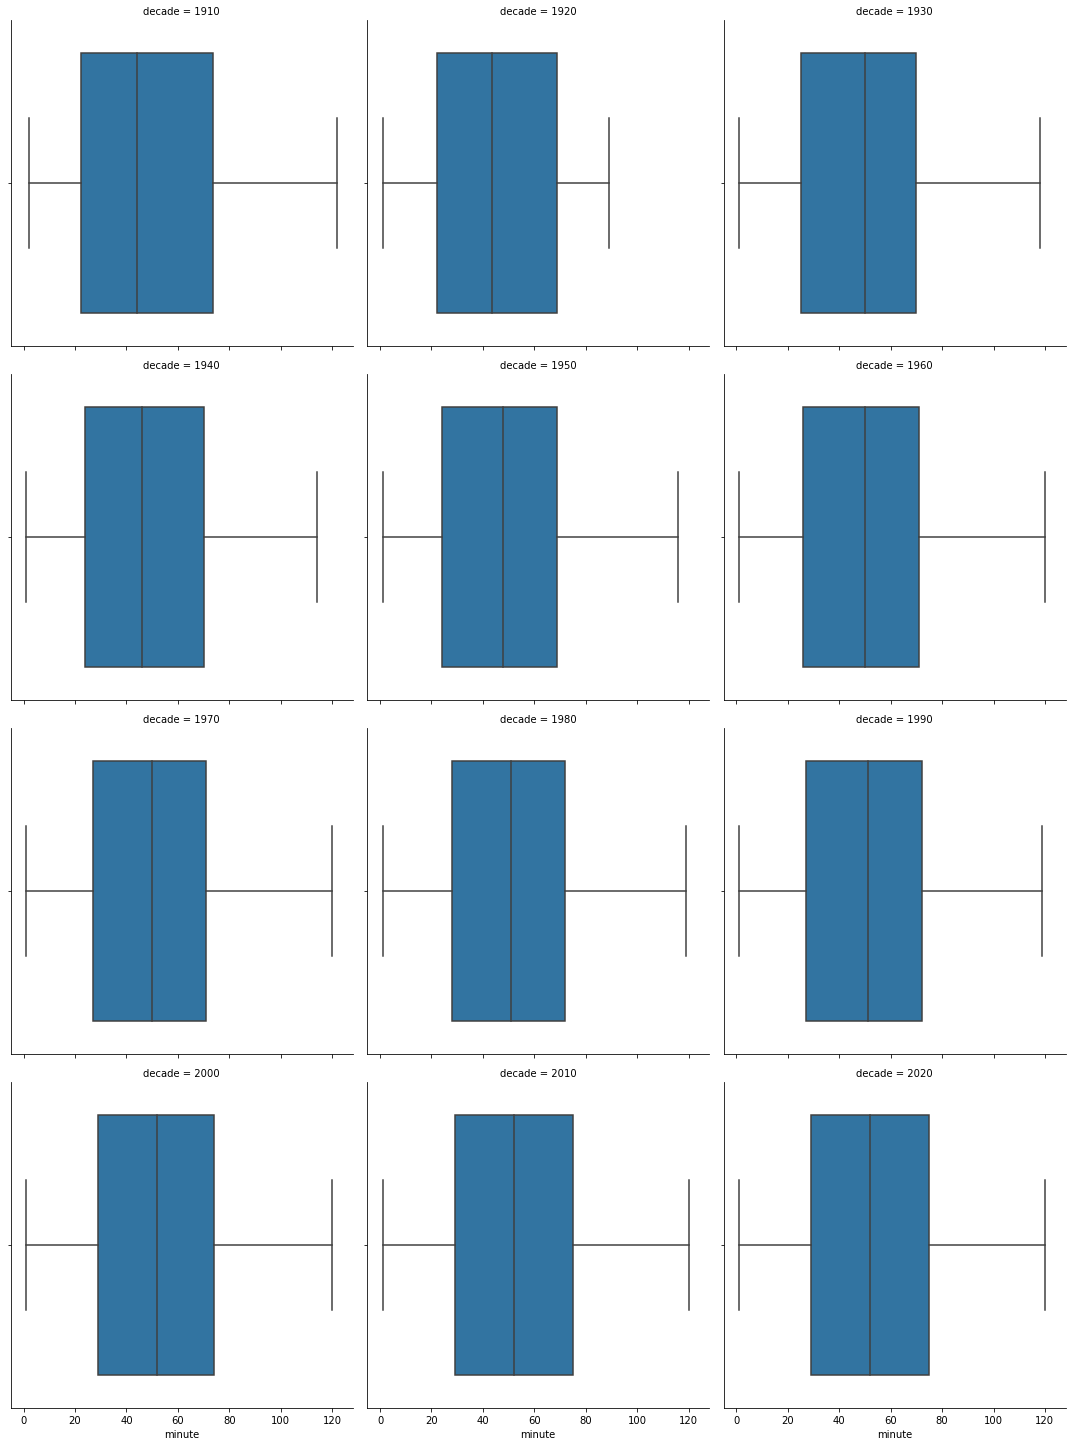

In [42]:
sns.catplot(x='minute', data=goalscorers, kind='box', col='decade', col_wrap=3)
plt.show()

Jeszcze taki pomysł, żeby zrobić wykres słupkowy tylko po % z każdej kategorii.

**3. Which 10 players have scored the most hat-tricks?**

Hat-trick is when a player scores 3 goals in a single match.

**4. What is the proportion of games won by each team at home and away? What is the difference between the proportions?**

**5. How many games have been won by the home team? And by the away team?**